<a href="https://colab.research.google.com/github/hitomitsu50/Sports_data_portfolio_MLB_Statcast/blob/main/2025%E5%B9%B4Statcast%E3%82%AB%E3%83%BC%E3%83%96%E3%81%AE%E8%90%BD%E5%B7%AE%E3%81%AB%E7%9B%B8%E9%96%A2%E3%81%99%E3%82%8B%E5%80%A4%E3%82%92%E6%A4%9C%E8%A8%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
#ライブラリのインストール
!pip install pybaseball japanize_matplotlib
!sudo apt-get -y update
!sudo apt-get -y install fonts-ipaexfont

Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 https://cli.github.com/packages stable InRelease
Hit:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-ipaexfont is already the newest version (00401-3ubuntu1).
0 upgraded, 0 newly installed,

In [18]:
#ライブラリのインポート
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib
import time
import glob
from pybaseball import statcast

In [19]:
#データの読み込みと結合
#ファイル名パターンに一致するＣＳＶ取得
csv_files_pattern="sample_data/statcast_*.csv"
csv_files=glob.glob(csv_files_pattern)

In [21]:
#各ＣＳＶファイルを読み込み リストに格納
dfs=[]
for file in csv_files:
  try:
    df_month=pd.read_csv(file)
    dfs.append(df_month)
    print(f"{file}を読み込みました。")
  except Exception as e:
    print(f"{file}の読み込み中にエラーが発生: {e}")

sample_data/statcast_2025-08-01-2025-08-31.csvを読み込みました。
sample_data/statcast_2025-07-01-2025-07-31.csvを読み込みました。
sample_data/statcast_2025-09-01-2025-09-28.csvを読み込みました。
sample_data/statcast_2025-03-18-2025-03-31.csvを読み込みました。
sample_data/statcast_2025-04-01-2025-04-30.csvを読み込みました。
sample_data/statcast_2025-06-01-2025-06-30.csvを読み込みました。
sample_data/statcast_2025-05-01-2025-05-31.csvを読み込みました。


In [22]:
#全てのデータフレームを結合
if dfs:
  df_combined=pd.concat(dfs, ignore_index=True)
  df=df_combined #結合したファイルをｄｆに格納
  print("全てのデータフレームを結合しました。")
  display(df.head())
  print(f"結合後の行数：{len(df)}")
else:
  print("読み込めるＣＳＶファイルが見つかりませんでした。")

全てのデータフレームを結合しました。


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,attack_angle,attack_direction,swing_path_tilt,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches
0,FF,2025-08-31,96.800,-1.300,5.690,"Iglesias, Raisel",681082,628452,strikeout,foul_tip,...,1.000,1.150,0.700,-0.700,35.600,0.837,32.075,18.179,44.557,5.902
1,FF,2025-08-31,96.500,-2.370,5.080,"Iglesias, Raisel",681082,628452,NaN,called_strike,...,1.000,1.240,0.880,-0.880,22.400,NaN,NaN,NaN,NaN,NaN
2,SI,2025-08-31,95.600,-1.350,5.660,"Iglesias, Raisel",681082,628452,NaN,called_strike,...,1.000,1.290,1.460,-1.460,34.200,NaN,NaN,NaN,NaN,NaN
3,FF,2025-08-31,95.800,-1.190,5.750,"Iglesias, Raisel",664056,628452,field_out,hit_into_play,...,1.000,1.030,0.560,0.560,35.700,9.598,2.043,20.982,49.140,29.611
4,FF,2025-08-31,96.100,-1.240,5.740,"Iglesias, Raisel",664056,628452,NaN,foul,...,1.000,1.240,0.560,0.560,36.800,5.349,9.027,22.616,41.166,22.626


結合後の行数：742080


In [24]:
#====================================
#1. データの抽出
#====================================
# データの準備
df_cu=df[df["pitch_type"]=="CU"].copy()

#条件設定
valid_descriptions=["strike","called_strike","swinging_strike","foul","foul_tip",
                    "in_play","hit_into_play","swinging_strike_blocked"]
df_cu=df_cu[df_cu["description"].isin(valid_descriptions)]

#名前の整形（名 姓 / カンマなし）
def format_name(name):
  if "," in name:
    last, first=name.split(",")
    return f"{first.strip()} {last.strip()}"
  return name
df_cu["player_name"]=df_cu["player_name"].apply(format_name)
#============================================================
#2. 指標の計算
#============================================================
#A: 技術的な落差(pfx_z)
#B: 物理的な落差(リリース高いー捕球高)
df_cu["total_drop"]=df_cu["release_pos_z"]-df_cu["plate_z"]

#投手ごとの集計
stats=df_cu.groupby("player_name").agg(
    Avg_Pfx_Drop=("pfx_z", "mean"),
    Avg_Total_Drop=("total_drop","mean"),
    Pitch_Count=("pfx_z", "count")
).reset_index()

#100球以上の投手に限定
stats_filtered=stats[stats["Pitch_Count"]>=100]

In [25]:
#============================================================
#3. 共通投手の特定
#============================================================
pd.options.display.float_format="{:.3f}".format

#技術的落差は数値が小さい順(マイナスに大きい順)
top_10_pfx=stats_filtered.sort_values(by="Avg_Pfx_Drop",ascending=True).head(10)
#物理的総落差は数値が大きい順
top_10_total=stats_filtered.sort_values(by="Avg_Total_Drop",ascending=False).head(10)

#共通投手の特定
set_pfx= set(top_10_pfx["player_name"])
set_total=set(top_10_total["player_name"])
bath_top10=set_pfx.intersection(set_total)

In [27]:
#==============================================================
#4.指定された形式で出力
#==============================================================
print("[1.技術的落差(pfx_z) TOP10]")
print(top_10_pfx[["player_name","Avg_Pfx_Drop","Pitch_Count"]].to_string(index=True))

print("\n" + "="*50 + "\n")

print("[2.視覚的トータル・ドロップ TOP10]")
print(top_10_total[["player_name", "Avg_Total_Drop","Pitch_Count"]].to_string(index=False))

print("\n" + "="*50 + "\n")

print(f"[両方のＴＯＰ１０にランクインした投手]: {both_top10}")

[1.技術的落差(pfx_z) TOP10]
            player_name  Avg_Pfx_Drop  Pitch_Count
179       Joey Cantillo        -1.504          190
258  Matthew Liberatore        -1.489          218
249     Mark Leiter Jr.        -1.458          121
136        Hogan Harris        -1.454          159
2           Aaron Ashby        -1.430          150
259           Max Fried        -1.401          323
287       Nick Martinez        -1.388          157
289        Nick Pivetta        -1.385          423
381       Tyler Glasnow        -1.361          182
46          Cade Gibson        -1.348          159


[2.視覚的トータル・ドロップ TOP10]
       player_name  Avg_Total_Drop  Pitch_Count
  Justin Verlander           4.923          255
       Blake Snell           4.917          126
      Mitch Spence           4.658          147
      Nick Pivetta           4.578          423
Matthew Liberatore           4.565          218
     Cal Quantrill           4.526          140
        Joey Wentz           4.489          189
    Qui

In [28]:
#=========================================
#共通投手の詳細データを取得
#=========================================
#"bith_top10"には{"Nick Pivetta","Matthew Liberatore","Aaron Ashby"}が入っているはず
common_pitchers_names=list(both_top10)

#共通投手の詳細統計情報を取得
common_pitchers_stats=stats_filtered[stats_filtered["player_name"].isin(common_pitchers_names)].copy()

#追加で必要な統計量(リリース高と球速)をdf_cuから集計
additional_stats=df_cu[df_cu["player_name"].isin(common_pitchers_names)].groupby("player_name").agg(
    Avg_Release_Speed=("release_speed","mean"),
    Avg_Release_Pos_Z=("release_pos_z","mean")
).reset_index()

#既存の共通投手データと結合
common_pitchers_stats=pd.merge(common_pitchers_stats, additional_stats,on="player_name",how="left")
display(common_pitchers_stats.head())

,player_name,Avg_Pfx_Drop,Avg_Total_Drop,Pitch_Count,Avg_Release_Speed,Avg_Release_Pos_Z
0,Aaron Ashby,-1.430,4.429,150,82.147,6.420
1,Matthew Liberatore,-1.489,4.565,218,77.502,6.611
2,Nick Pivetta,-1.385,4.578,423,78.959,6.850


In [40]:
#==================================================
#6. リーグ全体の平均値と比較表データを算出
#==================================================
#全体の平均リリーススピード
league_avg_speed=df_cu["release_speed"].mean()
#全体の平均リリース高
league_avg_z=df_cu["release_pos_z"].mean()
#全体の平均Pfx_Drop(Ascending=Trueなので小さいほど良い ＝ マイナスに大きい)
league_avg_pfx_drop=df_cu["pfx_z"].mean()#pfx_zはそのままの平均
#全体の平均Total_Drop(Descending=Falseなので大きいほど良い)
league_avg_total_drop=df_cu["total_drop"].mean()

#比較用のDataFrameを作成
comparison_data=pd.DataFrame({
    "指標":["Avg_Pfx_Drop","Avg_Total_Drop","Avg_Release_Speed","Avg_Release_Pos_Z"], # 'Avg_Pfx_Drop'を'Avg_pfx_Drop'に修正
    "リーグ平均":[league_avg_pfx_drop, league_avg_total_drop,league_avg_speed,league_avg_z]
})

#共通投手３名のデータを追加
for pitcher in common_pitchers_names:
  p_data=common_pitchers_stats[common_pitchers_stats["player_name"]==pitcher].iloc[0]
  comparison_data[pitcher]=[
      p_data["Avg_Pfx_Drop"],
      p_data["Avg_Total_Drop"],
      p_data["Avg_Release_Speed"],
      p_data["Avg_Release_Pos_Z"]
  ]

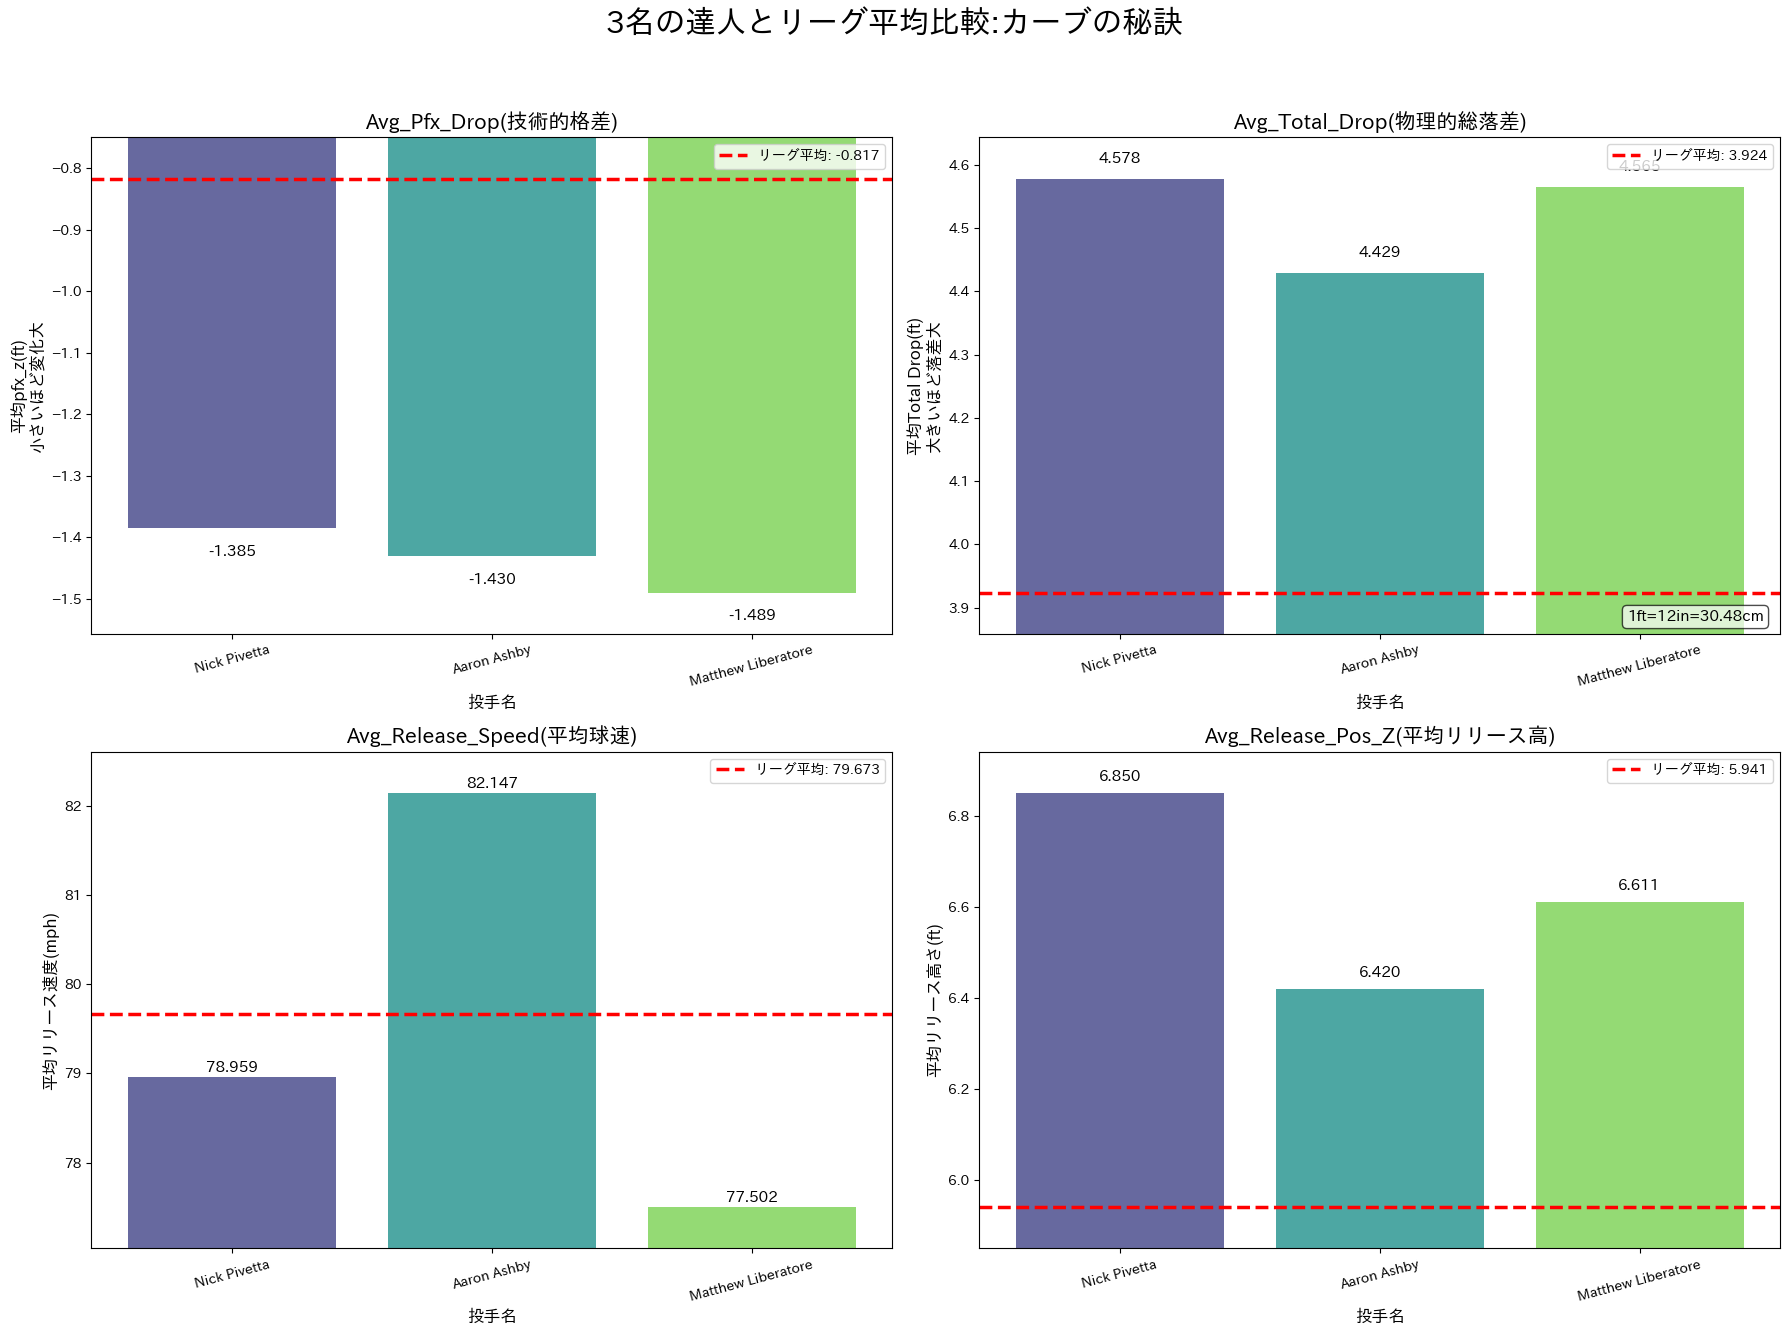

In [44]:
#==============================
#7. 可視化
#===============================
fig, axes=plt.subplots(2,2, figsize=(18,14))
fig.suptitle("3名の達人とリーグ平均比較:カーブの秘訣", fontsize=22,fontweight="bold")

#描画する投手リストと色
pitcher_names=list(common_pitchers_names)
colors=[plt.cm.viridis(i/len(pitcher_names)) for i in range(len(pitcher_names))]

#設定用の辞書(指標名:[タイトル,Y軸ラベル,単位換算表示])
config={
    "Avg_Pfx_Drop":[axes[0,0],"Avg_Pfx_Drop(技術的格差)","平均pfx_z(ft)\n小さいほど変化大",False],
    "Avg_Total_Drop":[axes[0,1],"Avg_Total_Drop(物理的総落差)","平均Total Drop(ft)\n大きいほど落差大",True],
    "Avg_Release_Speed":[axes[1,0],"Avg_Release_Speed(平均球速)","平均リリース速度(mph)",False],
    "Avg_Release_Pos_Z":[axes[1,1],"Avg_Release_Pos_Z(平均リリース高)","平均リリース高さ(ft)",False]
}

for metric,(ax,title,ylabel,show_unit) in config.items():
  #リーグ平均値の取得
  mean_val=comparison_data.loc[comparison_data["指標"]==metric,"リーグ平均"].values[0]

  #投手ごとの値を取得
  pitcher_values=[comparison_data.loc[comparison_data["指標"]==metric,name].values[0] for name in pitcher_names]

  #棒グラフの描画
  x_pos=range(len(pitcher_names))
  bars=ax.bar(x_pos,pitcher_values,color=plt.cm.viridis([0.2, 0.5, 0.8]),alpha=0.8)

  #リーグ平均の水平線
  ax.axhline(mean_val, color="red", linestyle="--",linewidth=2.5, label=f"リーグ平均: {mean_val:.3f}")

  #棒の先端に数値表示
  for bar in bars:
    yval=bar.get_height()
    #技術的落差(pfx_z)はマイナスなので 表示位置を調整
    va_pos="bottom" if yval < 0 else "bottom"
    offset = -0.05 if yval < 0 else 0.02

    ax.text(bar.get_x() + bar.get_width()/2, yval + offset,
            f"{yval:.3f}",ha="center",va=va_pos,fontsize=11,fontweight="bold")

  #グラフの装飾
  ax.set_title(title, fontsize=15, fontweight="bold")
  ax.set_ylabel(ylabel,fontsize=12)
  ax.set_xlabel("投手名",fontsize=12)

  ax.set_xticks(x_pos)
  ax.set_xticklabels(pitcher_names,fontsize=10)

  #スケールを調整して差を見やすくする
  y_values=pitcher_values + [mean_val]
  y_min=min(y_values)
  y_max=max(y_values)

  #y軸の範囲設定(上下に１０％の余白)
  padding=(y_max-y_min)*0.1
  ax.set_ylim(y_min-padding,y_max + padding)

  #投手名（X軸ラベル）を少し斜めで重なりを防ぐ
  ax.set_xticklabels(pitcher_names,fontsize=10,rotation=15)

  ax.legend(loc="upper right")

  #物理的総落差のグラフに単位換算を表示
  if show_unit:
    ax.text(0.98, 0.02, "1ft=12in=30.48cm",transform=ax.transAxes,
            fontsize=11,ha="right",va="bottom",fontweight="bold",
            bbox=dict(boxstyle="round",facecolor="white",alpha=0.7))
plt.tight_layout(rect=[0,0.03,1,0.95])
plt.show()


In [45]:
#最終的な比較表の表示
print("yn--- ３名の達人とリーグ平均の詳細比較（数値）---")
display(comparison_data)

yn--- ３名の達人とリーグ平均の詳細比較（数値）---


,指標,リーグ平均,Nick Pivetta,Aaron Ashby,Matthew Liberatore
0,Avg_Pfx_Drop,-0.817,-1.385,-1.430,-1.489
1,Avg_Total_Drop,3.924,4.578,4.429,4.565
2,Avg_Release_Speed,79.673,78.959,82.147,77.502
3,Avg_Release_Pos_Z,5.941,6.850,6.420,6.611
